In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
import spacy #Para Named Entity Recognition
from spacy import displacy #Para Named Entity Recognition
from collections import Counter #Para Named Entity Recognition
import en_core_web_sm #Para Named Entity Recognition
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
!pip install -U textblob #lemmatize
!python -m textblob.download_corpora #lemmatize
from textblob import Word #lemmatize
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package mo

In [ ]:
df_test = pd.read_csv("/content/drive/My Drive/datasetTPDatos/test.csv")
df_train = pd.read_csv("/content/drive/My Drive/datasetTPDatos/train.csv")
#Elimino duplicados
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [ ]:
#Definición de tipos
df_train['id'] = df_train['id'].astype(int)
df_train['keyword'] = df_train['keyword'].fillna(value = "noKeyword").astype('object')
df_train['location'] = df_train['location'].astype('object')
df_train['text'] = df_train['text'].astype('object')
df_train['target'] = df_train['target'].astype('bool')
df_test['id'] = df_test['id'].astype(int)
df_test['keyword'] = df_test['keyword'].fillna(value = "noKeyword").astype('object')
df_test['location'] = df_test['location'].astype('object')
df_test['text'] = df_test['text'].astype('object')

df_test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [ ]:
df_train_res = df_train.copy()
df_test_res = df_test.copy()

In [ ]:
#!pip install pycontractions
#from pycontractions import Contractions

In [ ]:
#cont = Contraction(api_key="glove-twitter-100")
#cont.load_models()

In [ ]:
#df_train_res['text'] = list(cont.expand_texts(df_train_cont['text'].to_list()))
#df_test_res['text'] = list(cont.expand_texts(df_test_cont['text'].to_list()))

In [ ]:
def clean_text(text):
  text = re.sub('(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+/(?:[-\w.]|(?:%[\da-fA-F]{2}))+', 'URL',text)
  text = re.sub('[=><.#,*;\']', '',text)
  text = re.sub('\n', '', text)
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('ûó','', text)
  text = re.sub('ûò','', text)
  text = re.sub('ûï','', text)
  text = re.sub('atåê','', text)
  text = re.sub('aq','', text)
  text = re.sub('ûª','u',text) 
  text = re.sub('åê','',text) 
  text = re.sub('û','u',text) 
  text = re.sub('ìü','',text) 
  return text

In [ ]:
def pre_process_text(text):
  processed_text = text.lower()
  processed_text = clean_text(processed_text)
  tokenizer = TweetTokenizer(reduce_len=True,strip_handles=True)
  processed_text = tokenizer.tokenize(processed_text)
  processed_text = ' '.join(processed_text)
    
  return processed_text

In [ ]:
#Pre limpieza:
df_train_res.head(2)

,id,text,target,keyword
0,1,our deed be the reason of this earthquake may ...,True,noKeyword
1,4,forest fire near la ronge sask canada,True,noKeyword


In [ ]:
df_test_res.head(2)

,id,keyword,location,text
0,0,noKeyword,NaN,Just happened a terrible car crash
1,2,noKeyword,NaN,"Heard about #earthquake is different cities, s..."


In [ ]:
df_train_res['text'] = df_train_res['text'].apply(lambda x : pre_process_text(x))
df_test_res['text'] = df_test_res['text'].apply(lambda x : pre_process_text(x))

In [ ]:
#Post limpieza
df_train_res.head(2)

,id,keyword,location,text,target
0,1,noKeyword,NaN,our deeds are the reason of this earthquake ma...,True
1,4,noKeyword,NaN,forest fire near la ronge sask canada,True


In [ ]:
df_test_res.head(2)

,id,keyword,location,text
0,0,noKeyword,NaN,just happened a terrible car crash
1,2,noKeyword,NaN,heard out earthquake is different cities stay ...


In [ ]:
# --------------- NLP - Manipulación  del texto --------------- #
#Idea 1 : Limpiar las stopwords y hacer un contador de entidades importantes (ej nombre paises, personas famosas, etc)

sw = stopwords.words("english")
tknz = TweetTokenizer(reduce_len=True, strip_handles=False)
nlp = en_core_web_sm.load()
catastrophe = df_train_res['keyword'].loc[df_train_res['keyword'] != 'noKeyword'].drop_duplicates().apply(lambda x: re.sub('%20', ' ',x))

def contains_location(text):
  count = 0
  words = nlp(text)
  for X in words.ents:
    if X.label_ in ['FAC','GPE','LOC']:
      count += 1
  return count

def count_no_stopwords(text):
  count = 0
  words = word_tokenize(text)
  for w in words:
    if w not in sw:
      count +=1
  return count

def text_size_word(text):
  words = tknz.tokenize(text)
  return len(words)
  
def lemmatize_catastrophe(text):
  count = 0
  words = tknz.tokenize(text)
  for w in words:
    if w in catastrophe.to_list():
      count += 1
  return count/len(words)

def count_url_per_tw(text):
  count = 0
  words = tknz.tokenize(text)
  if 'URL' in words:
    for w in words:
      if w == 'URL':
        count +=1
  return count/len(words)

def score_true_freqs(text):
  score = 0
  words = tknz.tokenize(text)
  for w in words:
    for t in true_freqs:
      if w == t[0]:
        score += t[1]
  return score

def score_false_freqs(text):
  score = 0
  words = tknz.tokenize(text)
  for w in words:
    for t in false_freqs:
      if w == t[0]:
        score += t[1]
  return score

def polarity_check(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def subjectivity_check(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity
  

In [ ]:
#Me quedo con columnas que me interesan
df_train_res = df_train_res.loc[:,['id','text','target','keyword']]
df_test_res = df_test_res.loc[:,['id','text','keyword']]
df_train_res

,id,text,target,keyword
0,1,our deed be the reason of this earthquake may ...,True,noKeyword
1,4,forest fire near la ronge sask canada,True,noKeyword
2,5,all resident ask to shelter in place be be not...,True,noKeyword
3,6,people receive wildfire evacuation order in ca...,True,noKeyword
4,7,just get send this photo from ruby alaska a sm...,True,noKeyword
...,...,...,...,...
7608,10869,two giant crane hold a bridge collapse into ne...,True,noKeyword
7609,10870,the out of control wild fire in california eve...,True,noKeyword
7610,10871,? s of volcano hawaii url,True,noKeyword
7611,10872,police investigate after an e-bike collide wit...,True,noKeyword


In [ ]:
# ---------------Creación de features --------------- #

# --------------------------------- Train ------------------------------------ #
df_train_res['count_words'] = df_train_res['text'].apply(text_size_word) #cant words por text
df_train_res['num_no_stopwords'] = df_train_res['text'].apply(count_no_stopwords)
df_train_res['no_stpw / count_words'] = df_train_res['num_no_stopwords'] / df_train_res['count_words']
df_train_res['count_catastrophe'] = df_train_res['text'].apply(lemmatize_catastrophe)
df_train_res['count_url'] = df_train_res['text'].apply(count_url_per_tw)
df_train_res['contains_location'] = df_train_res['text'].apply(contains_location)
# --- Idea 1 --- # Aplicar algun tipo de TF-IDF para descartar textos como "wreck wreck wreck wreck wreck " porque no aportan nada
# --- Idea 2 --- #  Top frecuencias para tweets verdaderos / falsos , darle un score a los tweets en base a esas frecuencias
# --- Idea 3 --- #  El array de freq true y false, tokenizar tweet, hacer el coseno y quedarse con el max y multiplicarlo por la freq?

In [ ]:
# --------------------------------- Test ------------------------------------- #

df_test_res['count_words'] = df_test_res['text'].apply(text_size_word) #cant words por text
df_test_res['num_no_stopwords'] = df_test_res['text'].apply(count_no_stopwords)
df_test_res['no_stpw / count_words'] = df_test_res['num_no_stopwords'] / df_test_res['count_words']
df_test_res['count_catastrophe'] = df_test_res['text'].apply(lemmatize_catastrophe)
df_test_res['count_url'] = df_test_res['text'].apply(count_url_per_tw)
df_test_res['contains_location'] = df_test_res['text'].apply(contains_location)

A partir de aca lematizo



In [ ]:
#Lemmatization

def lematizar_texto(text):
  lem = []
  for i in text.split():
    word1 = Word(i).lemmatize("n")
    word2 = Word(word1).lemmatize("v")
    word3 = Word(word2).lemmatize("a")
    lem.append(Word(word3).lemmatize())
  lem_text = " ".join(lem)
  return lem_text

In [ ]:
#Lematizo
df_train_res['text'] = df_train_res['text'].apply(lematizar_texto)

In [ ]:
df_test_res['text'] = df_test_res['text'].apply(lematizar_texto)

In [ ]:
tokenizer = TweetTokenizer(reduce_len=True,strip_handles=False)

false_words = []
true_words = []
for index,row in df_train_res.iterrows():
  clean_word = []
  dirty_words = tokenizer.tokenize(row['text'])
  for w in dirty_words:
    if w.isalpha() and w not in sw:
      clean_word.append(w.lower())
  if row['target'] == False:
    false_words += clean_word
  if row['target'] == True:
    true_words += clean_word  

false_freqs = FreqDist(false_words).most_common()
true_freqs = FreqDist(true_words).most_common()

In [ ]:
print("Len true: " + str(len(true_freqs)) + " Len false: " + str(len(false_freqs)) + " Suma: " + str( len(true_freqs) + len(false_freqs)))

Len true: 6406 Len false: 8376 Suma: 14782


In [ ]:
true_freqs 

In [ ]:
df_false_freqs = pd.DataFrame(data=false_freqs,columns=['word','frequency_false'])
df_true_freqs = pd.DataFrame(data=true_freqs,columns=['word','frequency_true'])

In [ ]:
merge = pd.concat([df_false_freqs,df_true_freqs])

In [ ]:
merge.loc[merge['word'] == 'url']

,word,frequency_false,frequency_true
0,url,2164.0,NaN
0,url,NaN,2460.0


In [ ]:
merge = merge.groupby('word').sum().reset_index()

In [ ]:
merge['prob_true'] = merge['frequency_true'] / (merge['frequency_true'] + merge['frequency_false'])
merge['prob_false'] = merge['frequency_false'] / (merge['frequency_true'] + merge['frequency_false'])

In [ ]:
from math import sqrt

def _confidence(freq1, freq2):
    n = freq1 + freq2

    if n == 0:
        return 0

    z = 1.281551565545
    p = float(freq1) / n

    left = p + 1/(2*n)*z*z
    right = z*sqrt(p*(1-p)/n + z*z/(4*n*n))
    under = 1+1/n*z*z

    return (left - right) / under #El mas chico porque hay un -

def confidence(freq1, freq2):
    if freq1 + freq2 == 0:
        return 0
    else:
        return _confidence(freq1, freq2) 

In [ ]:
merge['prob_true_conf'] = merge.apply(lambda row: confidence(row['prob_true'],row['prob_false']), axis=1)
merge['prob_false_conf'] = merge.apply(lambda row: confidence(row['prob_false'],row['prob_true']), axis=1)

In [ ]:
merge

,word,frequency_false,frequency_true,prob_true,prob_false,prob_true_conf,prob_false_conf
0,ac,2.0,0.0,0.000000,1.000000,0.000000,0.378448
1,academia,1.0,0.0,0.000000,1.000000,0.000000,0.378448
2,acc,1.0,1.0,0.500000,0.500000,0.105807,0.105807
3,accept,2.0,1.0,0.333333,0.666667,0.051109,0.177258
4,accepte,0.0,1.0,1.000000,0.000000,0.378448,0.000000
...,...,...,...,...,...,...,...
11479,ã,2.0,0.0,0.000000,1.000000,0.000000,0.378448
11480,å,9.0,3.0,0.250000,0.750000,0.030306,0.219530
11481,åç,2.0,0.0,0.000000,1.000000,0.000000,0.378448
11482,åè,3.0,1.0,0.250000,0.750000,0.030306,0.219530


In [ ]:
def score_prob_true(text):
  score = 0
  count = 0
  words = tknz.tokenize(text)
  for w in words:
    if w in merge['word'].tolist():
        score += merge.loc[merge['word'] == w,'prob_true_conf'].values[0]
        count += 1
  return score/count if count > 0 else 0

def score_prob_false(text):
  score = 0
  count = 0
  words = tknz.tokenize(text)
  for w in words:
    if w in merge['word'].tolist():
        score += merge.loc[merge['word'] == w,'prob_false_conf'].values[0]
        count += 1
  return score/count if count > 0 else 0

In [ ]:
df_train_res.head(2)

,id,text,target,keyword,count_words,num_no_stopwords,no_stpw / count_words,count_catastrophe,count_url,contains_location
0,1,our deed be the reason of this earthquake may ...,True,noKeyword,13,7,0.538462,0.076923,0.0,0
1,4,forest fire near la ronge sask canada,True,noKeyword,7,7,1.000000,0.142857,0.0,1


In [ ]:
tfidf_train_vec = TfidfVectorizer()
tfidf_train = tfidf_train_vec.fit_transform(df_train_res['text']).toarray()
print("Train: Matriz " + str(len(tfidf_train)) + 'x' + str(len(tfidf_train[0])))

Train: Matriz 7613x11929


In [ ]:
tfidf_test_vec = TfidfVectorizer()
tfidf_test = tfidf_test_vec.fit_transform(df_test_res['text']).toarray()
print("Test: Matriz de " + str(len(tfidf_test)) + 'x' + str(len(tfidf_test[0])))

Test: Matriz de 3263x7427


In [ ]:
def gen_feature_score(tfidf_vec): #Ver si se puede hacer con log reg + Gridsearch para valores
  feature_score = []
  for w in tfidf_vec.get_feature_names():
    if w in catastrophe.tolist():
      feature_score.append(50)
    else:
      NER_clf = nlp(w)
      if not NER_clf.ents:
        feature_score.append(1)
      else:
        for X in NER_clf.ents:
          if X.label_ in ['FAC','LOC','FACILITY']:
            feature_score.append(10)
          elif X.label_ in ['GPE','NORP']:
            feature_score.append(30)
          elif X.label_ == 'PERSON':
            feature_score.append(5)
          elif X.label_ == 'ORG':
            feature_score.append(8)
          elif X.label_ in ['MONEY','PERCENT']:
            feature_score.append(15)
          else:
            feature_score.append(1)
  return feature_score        

In [ ]:
feature_score_train = gen_feature_score(tfidf_train_vec)

In [ ]:
print("Todo OK") if len(feature_score_train) == len(tfidf_train_vec.get_feature_names()) else print("Todo rip")

Todo OK


In [ ]:
feature_score_test = gen_feature_score(tfidf_test_vec)

In [ ]:
print("Todo OK") if len(feature_score_test) == len(tfidf_test_vec.get_feature_names()) else print("Todo rip")

Todo OK


Features post lemmatization

In [ ]:
# --------------------------------- Train ------------------------------------ #
df_train_res['score_true'] = df_train_res['text'].apply(score_true_freqs)
df_train_res['score_false'] = df_train_res['text'].apply(score_false_freqs)
df_train_res['tfidf_fscore'] = tfidf_train @ feature_score_train
df_train_res['polarity_check'] = df_train_res['text'].apply(polarity_check)
df_train_res['subjectivity_check'] = df_train_res['text'].apply(subjectivity_check)

#Feature keyword
le = preprocessing.LabelEncoder()
df_train_res['keyword_encoded'] = df_train_res['keyword'].apply(clean_text)
df_train_res['keyword_encoded'] = le.fit_transform(df_train_res['keyword_encoded'])

df_train_res['score_prob_true'] = df_train_res['text'].apply(score_prob_true)
df_train_res['score_prob_false'] = df_train_res['text'].apply(score_prob_false)

In [ ]:
# --------------------------------- Test ------------------------------------- #
df_test_res['score_true'] = df_test_res['text'].apply(score_true_freqs)
df_test_res['score_false'] = df_test_res['text'].apply(score_false_freqs)
df_test_res['tfidf_fscore'] = tfidf_test @ feature_score_test
df_test_res['polarity_check'] = df_test_res['text'].apply(polarity_check)
df_test_res['subjectivity_check'] = df_test_res['text'].apply(subjectivity_check)

#Feature keyword
le = preprocessing.LabelEncoder()
df_test_res['keyword_encoded'] = df_test_res['keyword'].apply(clean_text)
df_test_res['keyword_encoded'] = le.fit_transform(df_test_res['keyword_encoded'])

df_test_res['score_prob_true'] = df_test_res['text'].apply(score_prob_true)
df_test_res['score_prob_false'] = df_test_res['text'].apply(score_prob_false)

In [ ]:
#from sklearn.decomposition import TruncatedSVD
#ti1 = TfidfVectorizer(ngram_range = (1 , 2))
#ti2 = TfidfVectorizer(ngram_range = (1 , 2))
#ti_train = ti1.fit_transform(X_train['text']).toarray()
#ti_test = ti2.fit_transform(X_test['text']).toarray()
#svd = TruncatedSVD(n_components=1000, n_iter=7, random_state=42)
#svd2 = TruncatedSVD(n_components=1000, n_iter=7, random_state=42)
#ti_red_train = svd.fit_transform(ti_train) #Baja el accuracy
#ti_red_test = svd2.fit_transform(ti_test) #Baja el accuracy

In [ ]:
#print("Train: Matriz de " + str(len(ti_red_train)) + 'x' + str(len(ti_red_train[0])) + " con Y_train: "+ str(len(y_train)))

In [ ]:
#print("Test: Matriz de " + str(len(ti_red_test)) + 'x' + str(len(ti_red_test[0])) + " con Y_test: "+ str(len(y_test)))

In [ ]:
#print("Todo OK") if len(ti_red_train) == len(y_train) and len(ti_red_test) == len(y_test) else print("F")

In [ ]:
#clf = LogisticRegression(max_iter=2000)
#clf.fit(ti_red_train, y_train)
#pred = clf.predict(ti_red_test)
#clf.score(ti_red_test,y_test)

In [ ]:
df_train_res.head(3)

,id,text,target,keyword,count_words,num_no_stopwords,no_stpw / count_words,count_catastrophe,count_url,contains_location,score_true,score_false,tfidf_fscore,polarity_check,subjectivity_check,keyword_encoded,score_prob_true,score_prob_false
0,1,our deed be the reason of this earthquake may ...,True,noKeyword,13,7,0.538462,0.076923,0.0,0,218,224,18.247059,0.0000,0.000,142,0.122639,0.112187
1,4,forest fire near la ronge sask canada,True,noKeyword,7,7,1.000000,0.142857,0.0,1,401,121,24.628690,0.1000,0.400,142,0.282948,0.015749
2,5,all resident ask to shelter in place be be not...,True,noKeyword,22,11,0.500000,0.045455,0.0,0,183,101,13.093889,0.0625,0.375,142,0.235372,0.057101


In [ ]:
df_test_res.head(3)

,id,text,keyword,count_words,num_no_stopwords,no_stpw / count_words,count_catastrophe,count_url,contains_location,score_true,score_false,tfidf_fscore,polarity_check,subjectivity_check,keyword_encoded,score_prob_true,score_prob_false
0,0,just happen a terrible car crash,noKeyword,6,4,0.666667,0.166667,0.0,0,219,119,21.839651,-1.00,1.00,142,0.139503,0.082216
1,2,hear about earthquake be different city stay s...,noKeyword,9,7,0.777778,0.111111,0.0,0,156,147,19.554826,0.25,0.55,142,0.113578,0.125665
2,3,there be a forest fire at spot pond goose be f...,noKeyword,19,9,0.473684,0.052632,0.0,0,412,184,12.120184,0.00,0.00,142,0.186692,0.072359


In [ ]:
feature_arr = ['count_words','num_no_stopwords','no_stpw / count_words','count_catastrophe','contains_location','count_url','tfidf_fscore','polarity_check','subjectivity_check','keyword_encoded','score_prob_true']

In [ ]:
feature_arr = ['tfidf_fscore','score_true','score_false','keyword_encoded']

In [ ]:
# -------------- Definición de train y test set - MLP (submit) --------------- #

y_train = np.array(df_train_res['target']) # prediction 
X_train = df_train_res.copy()  #Train submit
X_test = df_test_res.copy()
X_train_clf = X_train.loc[:,feature_arr] #Features del train
X_test_clf = X_test.loc[:,feature_arr] #Features del test
prints = (len(X_train_clf), len(y_train), len(X_test_clf))
print(prints) 

(7613, 7613, 3263)


In [ ]:
# --------------- Definición de train y test set local - MLP - (train spliteado en train2.0 y test porque no tengo target test) --------------- #

#X = np.array(X) #Esto se hace si tengo 1 solo feature
X = df_train_res.copy() #Train local
y = np.array(df_train_res['target']) # prediction 
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train_clf = X_train.loc[:,feature_arr] #Features del train 
X_test_clf = X_test.loc[:,feature_arr] #Features del test
prints = (len(X_train) , len(X_test) , len(y_train) , len(y_test), y)
print(prints) 

(5709, 1904, 5709, 1904, array([ True,  True,  True, ...,  True,  True,  True]))


In [ ]:
X_train_clf

,count_words,num_no_stopwords,no_stpw / count_words,count_catastrophe,contains_location,count_url,tfidf_fscore,polarity_check,subjectivity_check,keyword_encoded,score_prob_true
6714,17,14,0.823529,0.058824,0,0.058824,15.099450,0.000000,0.000000,189,0.289421
3424,13,6,0.461538,0.076923,0,0.076923,20.507763,0.000000,0.000000,95,0.047895
5444,10,7,0.700000,0.000000,0,0.000000,14.596787,0.000000,0.000000,152,0.129108
6904,9,7,0.777778,0.111111,0,0.000000,2.742525,-0.208333,0.166667,194,0.027632
5632,20,16,0.800000,0.050000,0,0.050000,27.628108,0.000000,0.000000,158,0.087516
...,...,...,...,...,...,...,...,...,...,...,...
1488,26,13,0.500000,0.038462,0,0.000000,16.064106,-0.028125,0.871875,40,0.034730
2920,29,19,0.655172,0.034483,0,0.000000,9.567203,0.000000,0.000000,82,0.032079
6215,20,11,0.550000,0.050000,0,0.000000,15.462144,0.700000,0.850000,175,0.028297
5916,11,7,0.636364,0.090909,0,0.090909,2.426411,0.000000,0.000000,167,0.015478


In [ ]:
#tfidf + log reg benja
vect = TfidfVectorizer()

train_vec = vect.fit_transform(X_train['text'])
test_vec = vect.transform(X_test['text'])
clf = LogisticRegression(max_iter=500, solver='lbfgs')
clf.fit(train_vec , y_train)
pred = clf.predict(test_vec)
clf.score(test_vec,y_test)

0.7930672268907563

In [ ]:
# --------------- Entrenamiento - Logistic Regression --------------- #
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_clf , y_train)
pred = clf.predict(X_test_clf)
clf.score(X_test_clf,y_test)

0.9185924369747899

In [ ]:
# -------------- Entrenamiento - Support Vector Classification -------------- #
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_clf, y_train)
pred = clf.predict(X_test_clf)
clf.score(X_test_clf,y_test)

0.9233193277310925

In [ ]:
# ----------- Entrenamiento - StandardScaler + X Algoritmo ----------- #
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
clf = make_pipeline(StandardScaler(),LogisticRegression(max_iter=2000))
clf.fit(X_train_clf, y_train)
pred = clf.predict(X_test_clf)
clf.score(X_test_clf,y_test)

0.9233193277310925

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='relu',learning_rate_init=0.0003,
                    hidden_layer_sizes=(50,40,100), random_state=1,
                    max_iter=400, solver='adam')

optimization_dict = {'hidden_layer_sizes': (list(range(10, 100)))}

model = GridSearchCV(clf, optimization_dict, 
                     scoring='accuracy', verbose=1)

model.fit(X_train_clf,y_train)

In [ ]:
print(model.best_score_)
print(model.best_params_)

0.7812188896273432
{'hidden_layer_sizes': 17}


In [ ]:
# --------------- Entrenamiento - MLP (Multilayer Perceptron) --------------- #
clf = MLPClassifier(activation='relu',learning_rate_init=0.0003,
                    hidden_layer_sizes=(50,35,60), random_state=1,
                    max_iter=400, solver='adam')

clf.fit(X_train_clf, y_train) 
pred = clf.predict(X_test_clf)
clf.score(X_test_clf,y_test)

0.9091386554621849

In [ ]:
def convertStates(x):
    if(x == True):
        return 1
    else:
        return 0

In [ ]:
predict = pd.DataFrame()
predict['id'] = X_test['id']
predict['target'] = pred
predict['target'] = predict['target'].apply(convertStates)
predict.to_csv('result.csv',index=False)
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --------------- Comparación - Test vs Predict local - MLP --------------- #
result = X_test.loc[:,['id','text','target']]
result['prediction'] = pred
diff = result.loc[result['target'] != result['prediction']]
diff

,id,text,target,prediction
988,1433,drake kill this dude and tea bag the dead body...,True,False
4112,5843,calgary news weather and traffic for august ~ ...,False,True
1431,2064,wa new wave a casualty of aid ? : tweet and si...,False,True
2715,3900,man currensy really be talkin that talk id be ...,True,False
4132,5875,calgary news weather and traffic for august ~ ...,False,True
...,...,...,...,...
2934,4216,URL jacksonville family band together a memori...,False,True
397,574,mourn notice for stab arson victim stir  û ÷ ...,False,True
6506,9301,so much shit ha happen today wtf idk how i sur...,True,False
6618,9480,truthURLnewsbbccnnislamtruthgodisisterrorismqu...,True,False


In [ ]:
df_train_res.loc[2417,'text']

'metro still doesnt know when blue & amp orange line will reopen empty passenger car derail ~ be not a new - series wmata'

In [ ]:
df_train_res.iloc[2417]

id                                                                    3476
text                     metro still doesnt know when blue & amp orange...
target                                                                True
keyword                                                           derailed
count_words                                                             24
num_no_stopwords                                                        19
no_stpw / count_words                                             0.791667
count_catastrophe                                                0.0416667
count_url                                                                0
contains_location                                                        0
score_true                                                             458
score_false                                                            667
tfidf_fscore                                                       14.3787
polarity_check           

In [ ]:
diff.loc[diff['id'] == 3476]

,id,text,target,prediction
2417,3476,metro still doesnt know when blue & amp orange...,True,False


In [ ]:
df_train_res.iloc[2417]

id                                                                    3476
text                     metro still doesnt know when blue & amp orange...
target                                                                True
keyword                                                           derailed
count_words                                                             24
num_no_stopwords                                                        19
no_stpw / count_words                                             0.791667
count_catastrophe                                                0.0416667
count_url                                                                0
contains_location                                                        0
score_true                                                             458
score_false                                                            667
tfidf_fscore                                                       14.3787
polarity_check           

In [ ]:
tknz.tokenize(df_train_res.loc[2417,'text'])

['metro',
 'still',
 'doesnt',
 'know',
 'when',
 'blue',
 '&',
 'amp',
 'orange',
 'line',
 'will',
 'reopen',
 'empty',
 'passenger',
 'car',
 'derail',
 '~',
 'be',
 'not',
 'a',
 'new',
 '-',
 'series',
 'wmata']

In [ ]:
diff.loc[diff['id'] == 2417]

,id,text,target,prediction
2309,3317,@_stiiilo i still got video of u demolished,False,True


In [ ]:
nlp = en_core_web_sm.load()
words = nlp(re.sub('#','','San Andres'))
print([(X.text, X.label_) for X in words.ents])

[('San Andres', 'ORG')]


In [ ]:
def cos(x1, x2):
  return np.dot(x1, x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))

In [ ]:
tweets = []
tkr = TweetTokenizer(reduce_len=True,strip_handles=False)
for tw in df_train_res['text'].tolist():
  tweets.append(tkr.tokenize(tw))

for tw in df_test_res['text'].tolist():
  tweets.append(tkr.tokenize(tw))

In [ ]:
from gensim.models import Word2Vec
word2vec = Word2Vec(tweets, size=300, min_count=1)

In [ ]:
word2vec.wv.most_similar(positive='our',topn=15)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sad', 0.999833881855011),
 ('girl', 0.999762773513794),
 ('before', 0.9997293949127197),
 ('yours', 0.9996795058250427),
 ('until', 0.999666690826416),
 ('delay', 0.9996641874313354),
 ('touch', 0.9996511936187744),
 ('yet', 0.9996462464332581),
 ('hard', 0.9996378421783447),
 ('gun', 0.9995980858802795),
 ('meet', 0.9995954632759094),
 ('deluge', 0.9995924234390259),
 ('fix', 0.9995806217193604),
 ('cat', 0.9995655417442322),
 ('with', 0.9995026588439941)]

In [ ]:
#Random forest de rama
le = preprocessing.LabelEncoder()

#df_train["text"] = le.fit_transform(df_train['text'])
#df_train["target"] = le.fit_transform(df_train["target"])
classifier = RandomForestClassifier(n_estimators = 450, random_state = 0) 

classifier.fit(X_train_clf,y_train)

pred = classifier.predict(X_test_clf)  # test the output by changing values 
classifier.score(X_test_clf,y_test)

0.9154411764705882

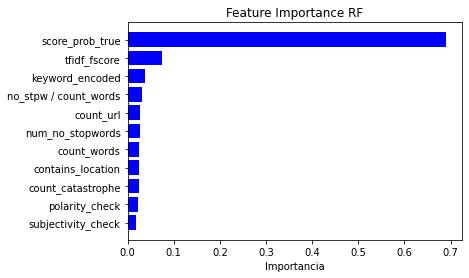

In [ ]:
features = X_train_clf.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance RF')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia')
plt.show()

In [ ]:
X_train_clf.columns

Index(['count_words', 'num_no_stopwords', 'no_stpw / count_words',
       'count_catastrophe', 'count_url', 'contains_location', 'score_true',
       'score_false', 'tfidf_fscore'],
      dtype='object')

In [ ]:
#csv de randomforest
pred = pd.DataFrame()
pred['id'] = X_test['id']
pred['target'] = Y_pred.tolist()
pred['target'] = pred['target'].apply(lambda x : round(x))
pred.to_csv('resultRFWF.csv',index=False)
files.download('resultRFWF.csv')

In [ ]:
#XGBoost de Rama
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 2, alpha = 10, n_estimators = 500)
xg_reg.fit(X_train_clf,y_train)
pred =xg_reg.predict(X_test_clf)
xg_reg.score(X_test_clf,y_test)

0.9259453781512605

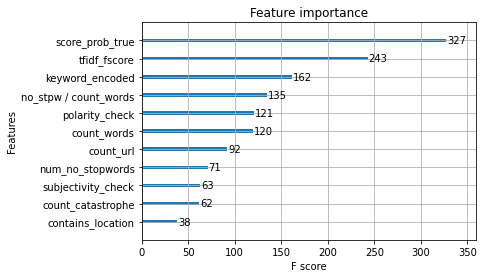

In [ ]:
xgb.plot_importance(xg_reg)